<a href="https://colab.research.google.com/github/arthurvale/Sbrt-2025/blob/main/Agrupamento_sbrt_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


from sklearn.metrics import silhouette_score



Mounted at /content/drive


In [ ]:
df_ow_5g = pd.read_parquet('/content/drive/MyDrive/5G/dataframe_final.parquet')


# Clusterização


In [ ]:
col_cluster = [
    'PCI',
    'SS_PBCH-RePower',
    'Speed',
    'SS_PBCH-RSRQ'
]

df_cluster=df_ow_5g[col_cluster]
df_cluster_2=df_cluster[['SS_PBCH-RePower','SS_PBCH-RSRQ']].copy()


In [ ]:
df_cluster_2.describe()

,SS_PBCH-RePower,SS_PBCH-RSRQ
count,604609.000000,604609.000000
mean,-109.709821,-21.519080
std,9.859284,7.746442
min,-124.900000,-54.600000
25%,-117.600000,-26.700000
50%,-111.900000,-21.300000
75%,-103.800000,-14.500000
max,-63.700000,-10.600000


In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_cluster_2)

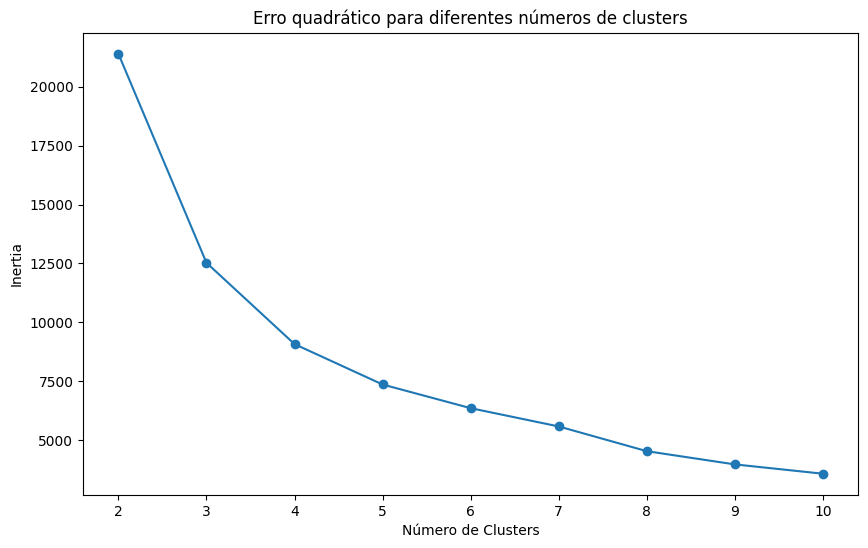

In [ ]:
erro_quadratico = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_features)
    erro_quadratico.append(km.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(2, 11), erro_quadratico, marker='o')
plt.title('Erro quadrático para diferentes números de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
df_cluster.corr()

,PCI,SS_PBCH-RePower,Speed,SS_PBCH-RSRQ
PCI,1.000000,0.017646,-0.054531,0.016885
SS_PBCH-RePower,0.017646,1.000000,-0.013586,-0.059038
Speed,-0.054531,-0.013586,1.000000,0.002883
SS_PBCH-RSRQ,0.016885,-0.059038,0.002883,1.000000


In [ ]:
kmeans = KMeans(n_clusters = 8, n_init = 10, init='random', max_iter = 300)
kmeans.fit(scaled_features)
df_Kmeans = df_cluster.copy()
df_Kmeans['cluster'] = kmeans.labels_
df_Kmeans.head()

,PCI,SS_PBCH-RePower,Speed,SS_PBCH-RSRQ,cluster
0,174,-102.4,14.15,-27.2,5
1,176,-107.4,14.15,-13.0,1
2,176,-107.4,14.15,-13.0,1
3,176,-107.4,14.15,-13.0,1
4,176,-107.4,14.15,-13.0,1


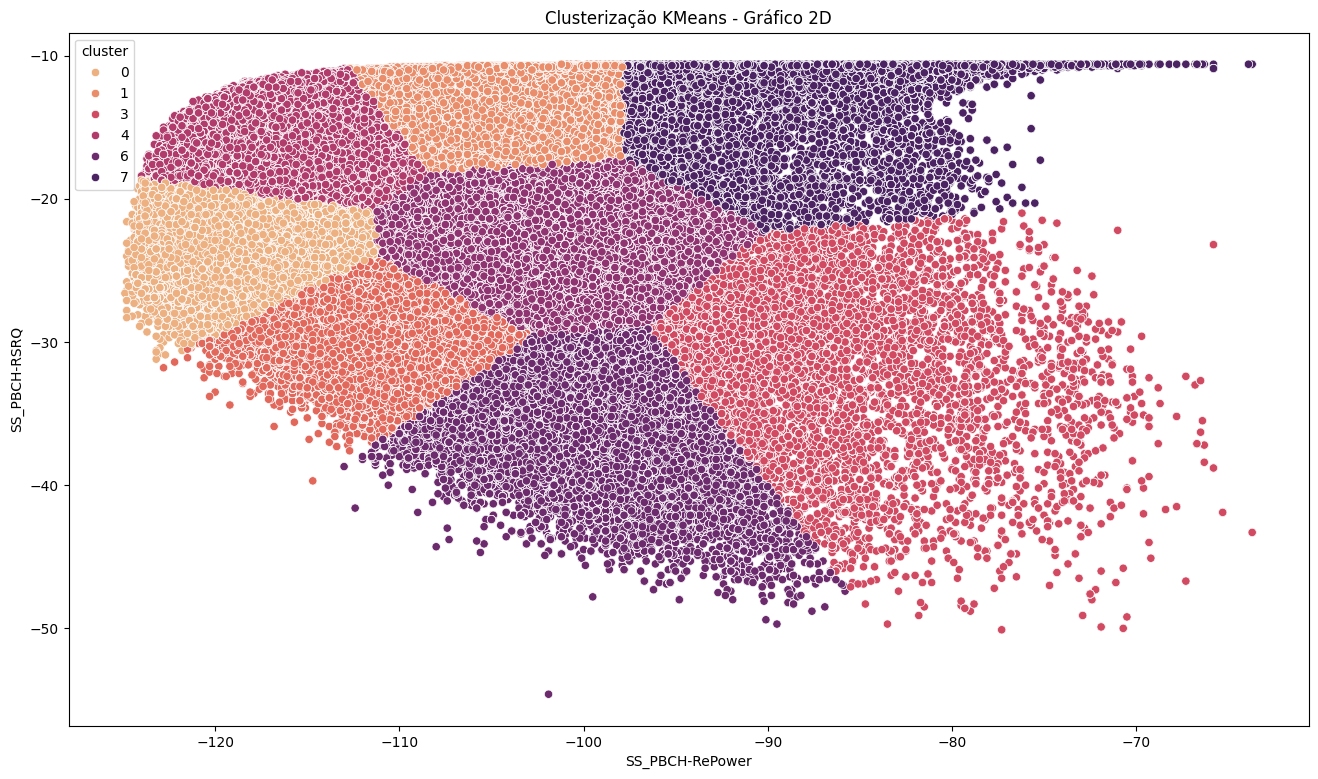

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data = df_Kmeans, x = 'SS_PBCH-RePower', y = 'SS_PBCH-RSRQ', hue = 'cluster', palette = 'flare')

plt.xlabel('SS_PBCH-RePower')
plt.ylabel('SS_PBCH-RSRQ')
plt.title("Clusterização KMeans - Gráfico 2D")
plt.show()

In [ ]:
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f"O Silhouette Score médio para os 8 clusters é: {silhouette_avg}")

O Silhouette Score médio para os 8 clusters é: 0.38777112313006157


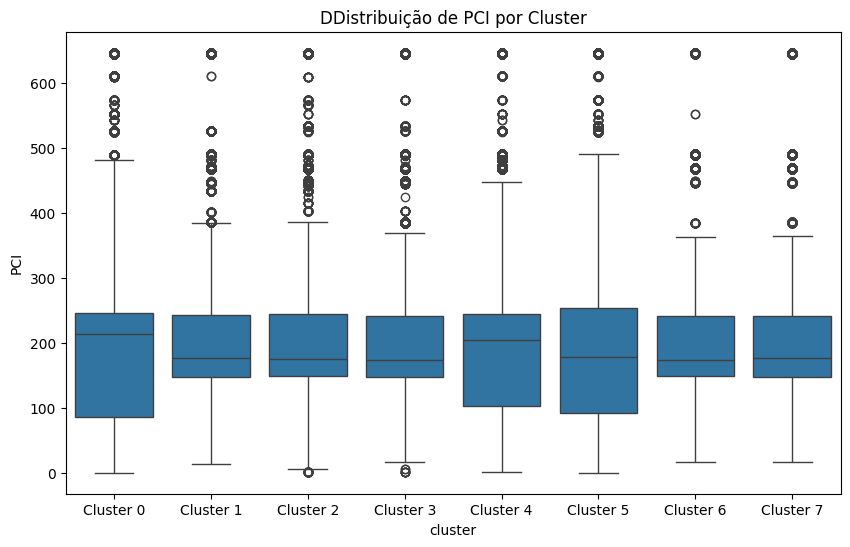

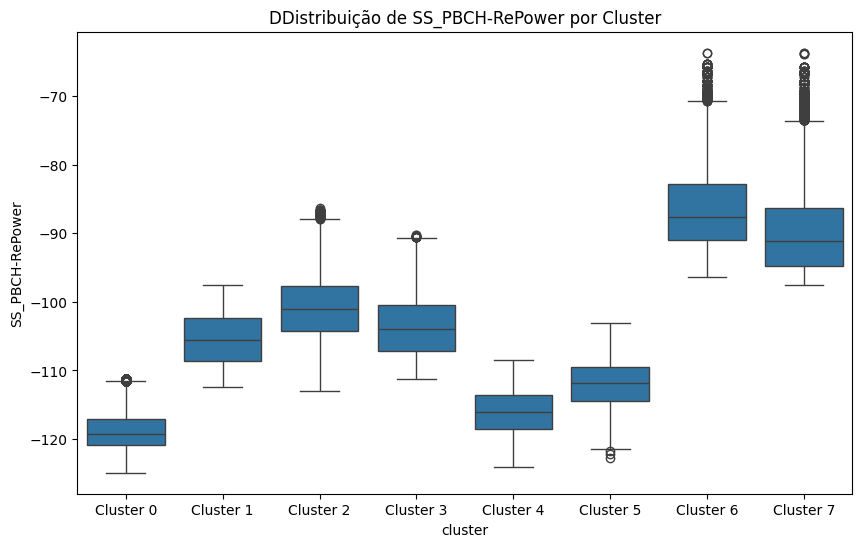

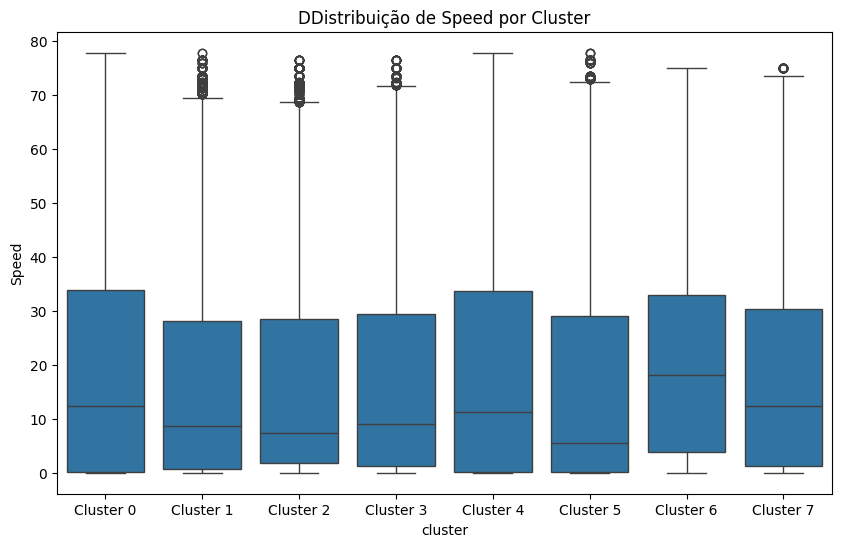

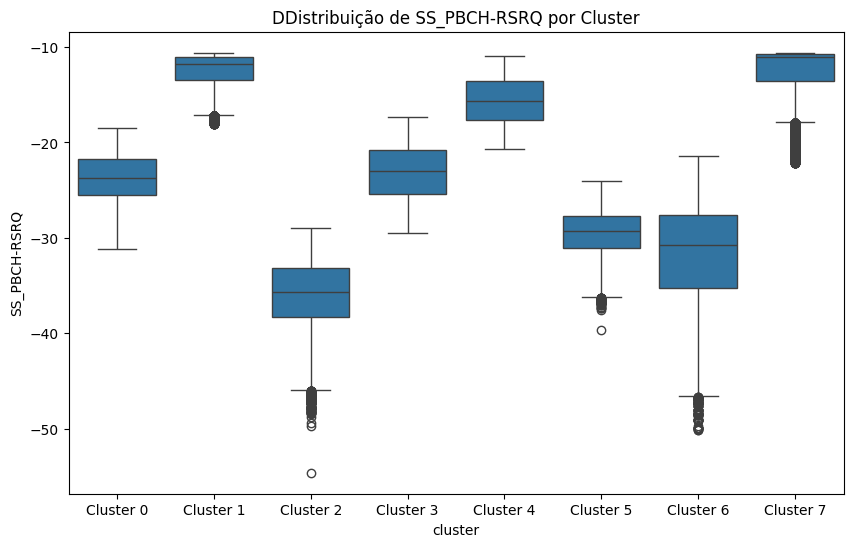

In [ ]:
for column in ['PCI','SS_PBCH-RePower', 'Speed', 'SS_PBCH-RSRQ']:
    plt.figure(figsize=(10, 6))

    sns.boxplot(x='cluster', y=column, data=df_Kmeans)

    plt.xticks(range(8), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7'])

    plt.title(f"DDistribuição de {column} por Cluster")
    plt.ylabel(column)

    plt.show()